In [1]:
import draw2Svg as dw

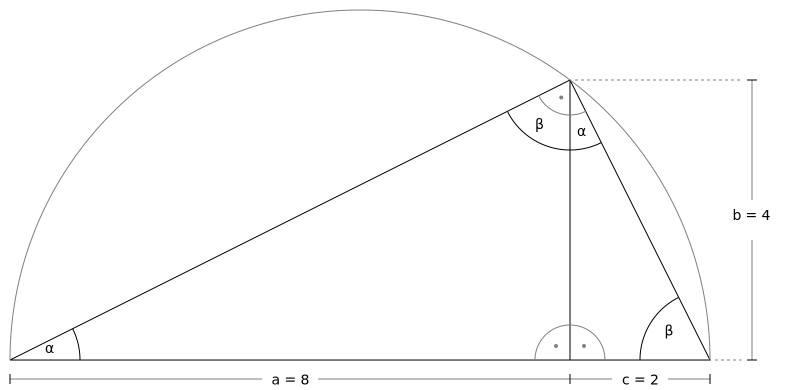

In [5]:
# here x and y units must be the same
xunit = 70
yunit = xunit
xnum = 12 # posts (= one more than divisions)
ynum = 7
mleft=10
mright=10
mtop=10
mbot=-40
xsize = xunit*(xnum-1)
ysize = yunit*(ynum-1)
w = xsize+mleft+mright
h = ysize+mtop+mbot
d = dw.Drawing(w,h)

exec(open('draw2Svg_funs.py').read())
from math import sqrt


textsiz = 14

def xgrid(inval):
    """for xnum=4, inval is from 0 (left) to 3 (right)
    as range to write"""
    return scale(inval,0,xnum-1,mleft,mleft+xsize)

def ygrid(inval):
    """for num=11, inval is from 0 (top) to 10 (bottom)
    as range to write"""
    return scale(inval,0,ynum-1,mtop,mtop+ysize)

# triangle
p1 = xgrid(0),ygrid(5)
p2 = xgrid(8),ygrid(1)
p3 = xgrid(10),ygrid(5)
p4 = xgrid(8),ygrid(5)
p = dw.Path(stroke='black',fill='none')
p.M(*p1).L(*p2).L(*p3).L(*p4).L(*p1)
p.M(*p4).L(*p2)
d.append(p)

# half circle
p = dw.Path(stroke='gray',fill='none')
p.M(*p1)
p.A(xunit*5,xunit*5,0,1,1,*p3)
d.append(p)

# text and ticks
ticklen = 10
y = ygrid(5.2) 
tick(xgrid(0),y,ticklen)
tick(xgrid(8),y,ticklen)
tick(xgrid(10),y,ticklen)
y += ticklen/2
d.append(dw.Line(xgrid(0),y,xgrid(3.6),y,stroke='black',stroke_width=0.5))
d.append(dw.Line(xgrid(4.4),y,xgrid(8),y,stroke='black',stroke_width=0.5))
d.append(dw.Line(xgrid(8),y,xgrid(8.6),y,stroke='black',stroke_width=0.5))
d.append(dw.Line(xgrid(9.4),y,xgrid(10),y,stroke='black',stroke_width=0.5))
d.append(dw.Text('a = 8',textsiz,xgrid(4),y,text_anchor='middle',valign='middle'))
d.append(dw.Text('c = 2',textsiz,xgrid(9),y,text_anchor='middle',valign='middle'))
y = ygrid(3)
x = xgrid(10.6)
d.append(dw.Text('b = 4',textsiz,x,y,text_anchor='middle'))
d.append(dw.Line(x,ygrid(1),x,y-20,stroke='black',stroke_width=0.5))
d.append(dw.Line(x,y+20,x,ygrid(5),stroke='black',stroke_width=0.5))
x = xgrid(10.6)+ticklen/2
tick(x,ygrid(1),-ticklen)
tick(x,ygrid(5),-ticklen)

# angles
xs1 = xunit*sqrt(4/5) ##x vom schnittpunkt ist sqrt(4/5)
s1 = xgrid(0)+xs1,ygrid(5)-xs1/2 #y = 1/2x
xs2 = xunit*sqrt(1/5) #x shift for p2 to the right
s2r = p2[0]+xs2,p2[1]+xs2*2
s2l = p2[0]-xs1,p2[1]+xs1/2
s3 = p3[0]-xs2,p3[1]-xs2*2
p = dw.Path(stroke='black',fill='none')
p.M(xgrid(1),ygrid(5))
p.A(xunit,xunit,0,0,0,*s1)
p.M(*s2r)
p.A(xunit,xunit,0,0,1,*s2l)
p.M(xgrid(9),ygrid(5))
p.A(xunit,xunit,0,0,1,*s3)
d.append(p)
p = dw.Path(stroke='gray',fill='none')
#right angles
p.M(p4[0]-xunit/2,ygrid(5))
p.A(xunit/2,xunit/2,0,0,1,p4[0]+xunit/2,ygrid(5))
p.M(p2[0]+xs2/2,p2[1]+xs2)
p.A(xunit/2,xunit/2,0,0,1,p2[0]-xs1/2,p2[1]+xs1/4)
d.append(p)
d.append(dw.Circle(p4[0]+xunit/5,p4[1]-xunit/5,2,fill='gray'))
d.append(dw.Circle(p4[0]-xunit/5,p4[1]-xunit/5,2,fill='gray'))
d.append(dw.Circle(p4[0]-xunit/8,p2[1]+xunit/4,2,fill='gray'))

# text
d.append(dw.Text('α',textsiz,xgrid(0.5),ygrid(4.9)))
d.append(dw.Text('α',textsiz,xgrid(8.1),ygrid(1.8)))
d.append(dw.Text('β',textsiz,xgrid(7.5),ygrid(1.7)))
d.append(dw.Text('β',textsiz,xgrid(9.35),ygrid(4.65)))

# helper lines
d.append(dw.Line(p2[0]+5,p2[1],xgrid(10.45),ygrid(1),stroke='gray',stroke_dasharray='3 3'))
d.append(dw.Line(p3[0]+5,p3[1],xgrid(10.45),ygrid(5),stroke='gray',stroke_dasharray='3 3'))

#d.savePng('../../images/01-GS-06-d.png')
d.saveSvg('../../images/01-GS-06-d.svg')
d